In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('life.csv')

missing_values = df.isnull().sum()
print("Antal saknade värden per kolumn:")
print(missing_values)

for column in df.columns:
    if df[column].dtype == 'object':
        # Fyll NaN-värden med mest frekventa strängvärde
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Fyll NaN-värden med medelvärdet
        df[column] = df[column].fillna(df[column].mean())


# Visa antalet saknade värden per kolumn efter att NaN-värden har fyllts
print("\nAntal saknade värden per kolumn efter att NaN-värden har fyllts:")
print(df.isnull().sum())

# Spara den uppdaterade dataramen till en ny CSV-fil
df.to_csv('life_updated.csv', index=False)

df = pd.read_csv('life_updated.csv')


Antal saknade värden per kolumn:
Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

Antal saknade värden per kolumn efter att NaN-värden har fyllts:
Country                 0
Year                    0
Status                  0
Population              0
Hepatitis B             0
Measles                 0
Polio                   0
Diphtheria              0
HIV/AIDS                0
infant deaths           0
under-five deaths       0
Total expenditure       0
GDP                     0
BMI                     0
thinness  1-19 years

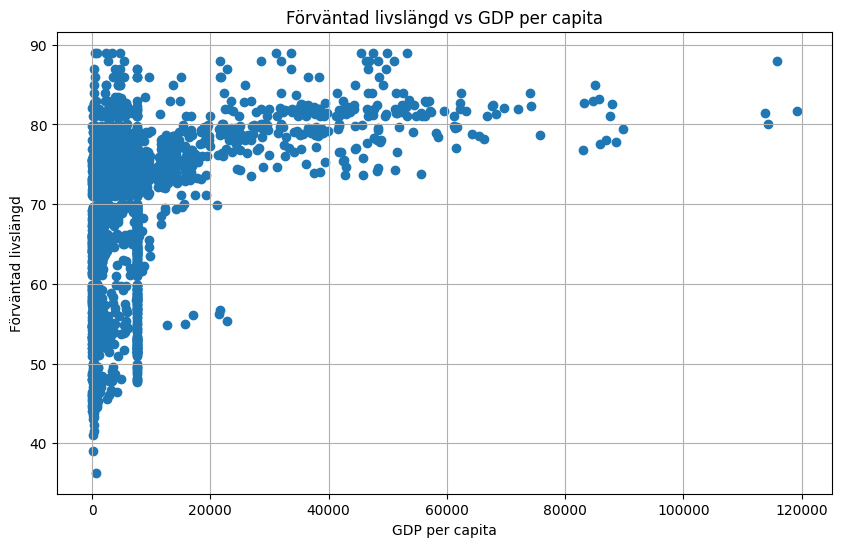

In [3]:
# Skapa en scatter plot för att visa sambandet mellan GDP per capita och förväntad livslängd
plt.figure(figsize=(10, 6))  # Ange storleken på figuren
plt.scatter(df['GDP'], df['Life expectancy'])  # Plotta scatter plot
plt.title('Förväntad livslängd vs GDP per capita')  # Ange titel för plotten
plt.xlabel('GDP per capita')  # Ange etikett för x-axeln
plt.ylabel('Förväntad livslängd')  # Ange etikett för y-axeln
plt.grid(True)  # Visa rutnätet
plt.show()  # Visa plotten

In [4]:
# Definiera kvantiler för högt respektive lågt GDP per capita och filtrerar sedan dataramen för länder med hög förväntad livslängd men lågt GDP
low_gdp_threshold = df['GDP'].quantile(0.25)  # Definiera tröskelvärdet för lågt GDP (t.ex. 25:e percentilen)
high_life_expectancy_threshold = df['Life expectancy'].quantile(0.75)  # Definiera tröskelvärdet för hög förväntad livslängd (t.ex. 75:e percentilen)

# Filtrera dataramen för länder med hög förväntad livslängd men lågt GDP
low_gdp_high_life_expectancy = df[(df['GDP'] < low_gdp_threshold) & (df['Life expectancy'] > high_life_expectancy_threshold)]

# Skriv ut länder med hög förväntad livslängd men lågt GDP/GDP per capita
print("Länder med hög förväntad livslängd men lågt GDP/GDP per capita:")
print(low_gdp_high_life_expectancy[['Country', 'Life expectancy', 'GDP']])


Länder med hög förväntad livslängd men lågt GDP/GDP per capita:
                     Country  Life expectancy         GDP
21                   Albania             76.2  494.358832
24                   Albania             75.9  363.136850
125                Australia             79.9  281.817630
130                  Austria             81.1  554.715320
137                  Austria             79.8  443.993610
150               Azerbaijan             78.0  495.294791
178                  Bahrain             76.7  251.183290
322   Bosnia and Herzegovina             77.0  535.865550
324   Bosnia and Herzegovina             76.9   55.156834
327   Bosnia and Herzegovina             76.0  575.316640
377        Brunei Darussalam             76.3  398.966920
481                   Canada             82.0  544.433760
543                    Chile             77.3  511.368479
600               Costa Rica             78.9  612.623418
605               Costa Rica             78.3  462.149650
607     

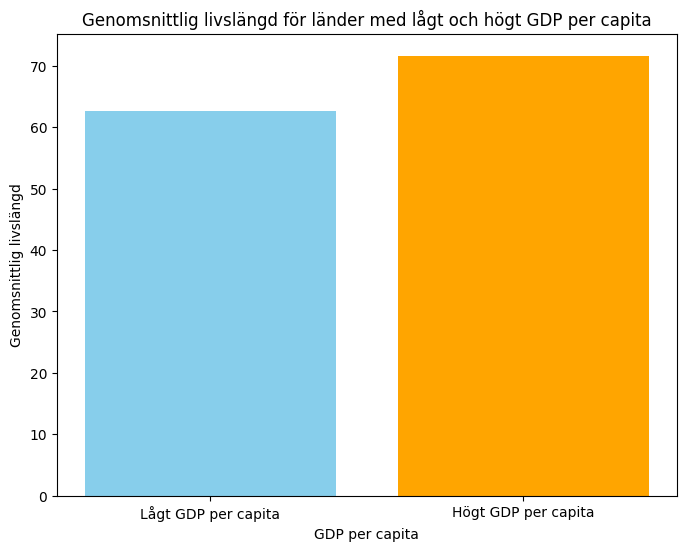

In [5]:
# Definiera tröskelvärdet för lågt GDP per capita
low_gdp_threshold = df['GDP'].quantile(0.25)  # Till exempel, 25:e percentilen

# Filtrera dataramen för länder med lågt GDP per capita
low_gdp_countries = df[df['GDP'] < low_gdp_threshold]

# Beräkna genomsnittlig livslängd för länder med lågt och högt GDP per capita
avg_life_expectancy_low_gdp = low_gdp_countries['Life expectancy'].mean()
avg_life_expectancy_high_gdp = df[df['GDP'] >= low_gdp_threshold]['Life expectancy'].mean()

# Skapa ett stapeldiagram för att jämföra genomsnittlig livslängd för länder med lågt och högt GDP per capita
plt.figure(figsize=(8, 6))
plt.bar(['Lågt GDP per capita', 'Högt GDP per capita'], [avg_life_expectancy_low_gdp, avg_life_expectancy_high_gdp], color=['skyblue', 'orange'])
plt.title('Genomsnittlig livslängd för länder med lågt och högt GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Genomsnittlig livslängd')
plt.savefig('life_expectancy_diagram.png')
plt.show()

Länder med hög förväntad livslängd och högt GDP/GDP per capita:
                  Country  Life expectancy          GDP
64    Antigua and Barbuda             76.4  13566.95410
65    Antigua and Barbuda             76.2  12888.29667
66    Antigua and Barbuda             76.1  12224.86416
67    Antigua and Barbuda             75.9  12565.44197
80              Argentina             76.3  13467.12360
...                   ...              ...          ...
2721              Uruguay             76.8  16737.89827
2722              Uruguay             76.8  16881.25680
2724              Uruguay             77.0  14166.49980
2725              Uruguay             76.3  11938.21200
2726              Uruguay             76.6   9415.17386

[345 rows x 3 columns]


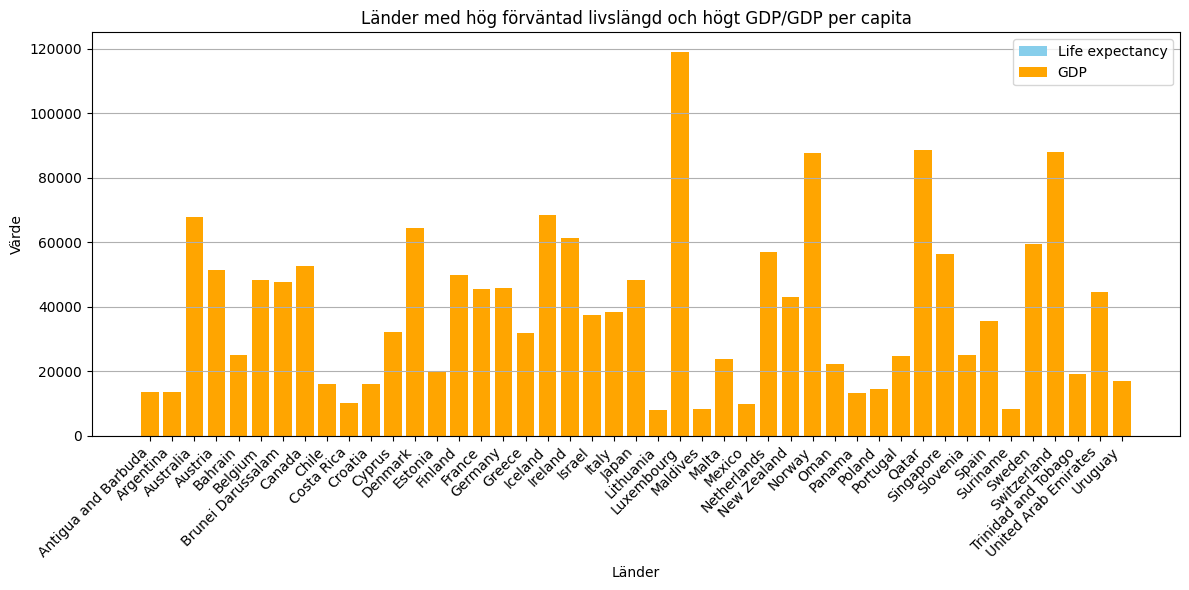

In [6]:
# Definiera kvantiler för hög förväntad livslängd och högt GDP per capita
high_gdp_threshold = df['GDP'].quantile(0.75)  # Definiera tröskelvärdet för högt GDP (t.ex. 75:e percentilen)
high_life_expectancy_threshold = df['Life expectancy'].quantile(0.75)  # Definiera tröskelvärdet för hög förväntad livslängd (t.ex. 75:e percentilen)

# Filtrera dataramen för länder med både hög förväntad livslängd och högt GDP
high_gdp_high_life_expectancy = df[(df['GDP'] > high_gdp_threshold) & (df['Life expectancy'] > high_life_expectancy_threshold)]

# Skriv ut länder med hög förväntad livslängd och högt GDP
print("Länder med hög förväntad livslängd och högt GDP/GDP per capita:")
print(high_gdp_high_life_expectancy[['Country', 'Life expectancy', 'GDP']])

# Skapa ett stapeldiagram för länder med hög förväntad livslängd och högt GDP
plt.figure(figsize=(12, 6))
plt.bar(high_gdp_high_life_expectancy['Country'], high_gdp_high_life_expectancy['Life expectancy'], color='skyblue', label='Life expectancy')
plt.bar(high_gdp_high_life_expectancy['Country'], high_gdp_high_life_expectancy['GDP'], color='orange', label='GDP')
plt.xlabel('Länder')
plt.ylabel('Värde')
plt.title('Länder med hög förväntad livslängd och högt GDP/GDP per capita')
plt.xticks(rotation=45, ha='right')  # Roterar x-axeln för att bättre passa in landets namn
plt.legend()
plt.grid(axis='y')
plt.tight_layout()  # Justerar layouten för att undvika överlappning av etiketter
plt.show()

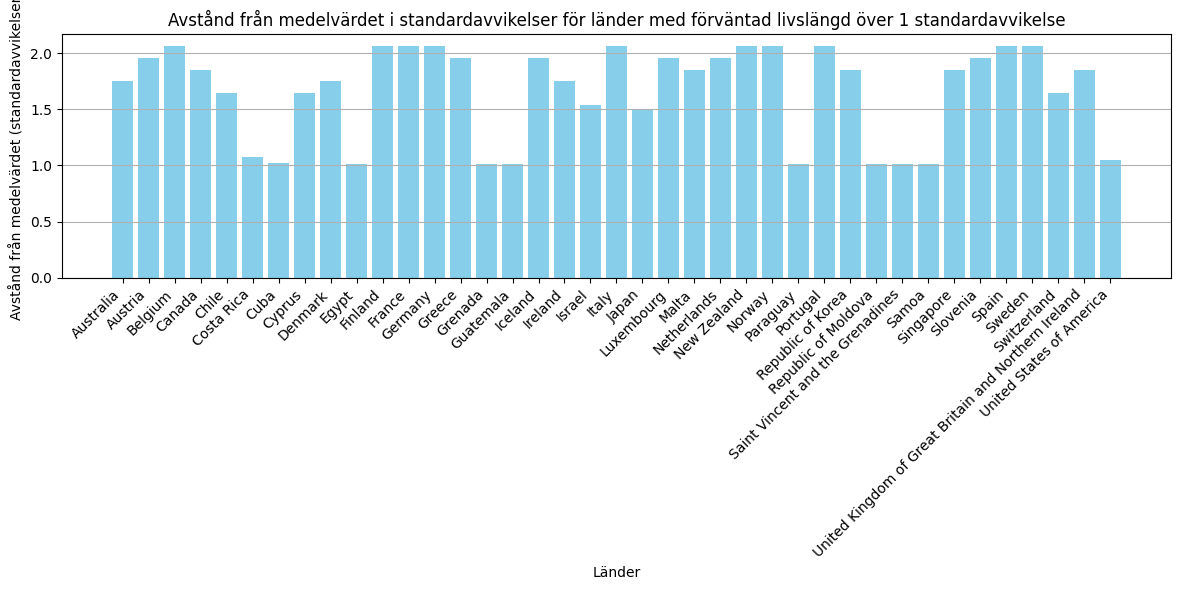

In [7]:
# Beräkna medelvärdet och standardavvikelsen för förväntad livslängd
mean_life_expectancy = df['Life expectancy'].mean()  # Beräkna medelvärdet för förväntad livslängd
std_life_expectancy = df['Life expectancy'].std()    # Beräkna standardavvikelsen för förväntad livslängd

# Skapa en ny kolumn som visar avståndet från medelvärdet i standardavvikelser
df['Distance from Mean'] = (df['Life expectancy'] - mean_life_expectancy) / std_life_expectancy

# Identifiera länder där avståndet från medelvärdet är över 1 standardavvikelse
countries_above_std_dev = df[df['Distance from Mean'] > 1]

# Skapa stapeldiagram för att visa avståndet från medelvärdet i standardavvikelser för dessa länder
plt.figure(figsize=(12, 6))  # Ange figurens storlek
plt.bar(countries_above_std_dev['Country'], countries_above_std_dev['Distance from Mean'], color='skyblue')  # Plotta stapeldiagrammet
plt.title('Avstånd från medelvärdet i standardavvikelser för länder med förväntad livslängd över 1 standardavvikelse')  # Ange titel för plotten
plt.xlabel('Länder')  # Ange etikett för x-axeln
plt.ylabel('Avstånd från medelvärdet (standardavvikelser)')  # Ange etikett för y-axeln
plt.xticks(rotation=45, ha='right')  # Roterar x-axeln för att bättre passa in landets namn
plt.grid(axis='y')  # Visa rutnät för y-axeln
plt.tight_layout()  # Justera layouten för att undvika överlappning av etiketter
plt.show()  # Visa plotten


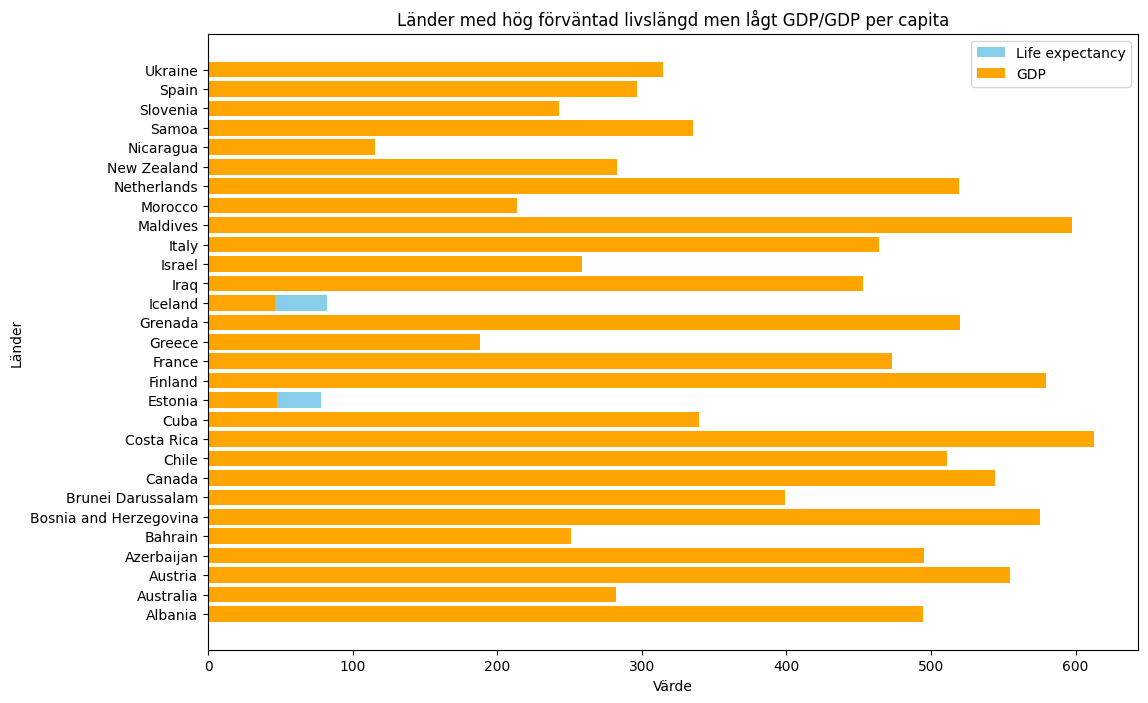

In [8]:
# Definiera kvantiler för högt respektive lågt GDP per capita
low_gdp_threshold = df['GDP'].quantile(0.25)  # Definiera tröskelvärdet för lågt GDP (t.ex. 25:e percentilen)
high_life_expectancy_threshold = df['Life expectancy'].quantile(0.75)  # Definiera tröskelvärdet för hög förväntad livslängd (t.ex. 75:e percentilen)

# Filtrera dataramen för länder med hög förväntad livslängd men lågt GDP
low_gdp_high_life_expectancy = df[(df['GDP'] < low_gdp_threshold) & (df['Life expectancy'] > high_life_expectancy_threshold)]

# Rita diagrammet
plt.figure(figsize=(12, 8))  # Ange figurens storlek
plt.barh(low_gdp_high_life_expectancy['Country'], low_gdp_high_life_expectancy['Life expectancy'], color='skyblue', label='Life expectancy')  # Plotta stapeldiagrammet för förväntad livslängd
plt.barh(low_gdp_high_life_expectancy['Country'], low_gdp_high_life_expectancy['GDP'], color='orange', label='GDP')  # Plotta stapeldiagrammet för GDP
plt.xlabel('Värde')  # Ange etikett för x-axeln
plt.ylabel('Länder')  # Ange etikett för y-axeln
plt.title('Länder med hög förväntad livslängd men lågt GDP/GDP per capita')  # Ange titel för plotten
plt.legend()  # Visa legendan
plt.show()  # Visa plotten


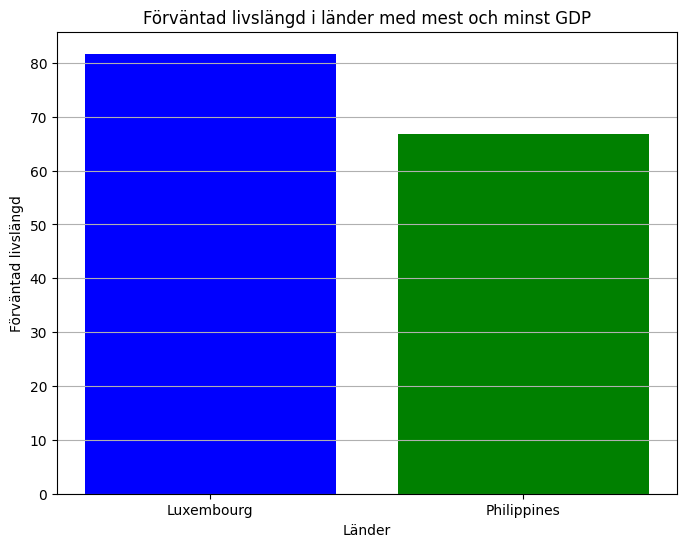

In [9]:
# Identifiera landet med högst och lägst GDP
highest_gdp_country = df.loc[df['GDP'].idxmax()]
lowest_gdp_country = df.loc[df['GDP'].idxmin()]

# Skapa data för stapeldiagrammet
countries = [highest_gdp_country['Country'], lowest_gdp_country['Country']]
life_expectancies = [highest_gdp_country['Life expectancy'], lowest_gdp_country['Life expectancy']]

# Skapa stapeldiagrammet
plt.figure(figsize=(8, 6))
plt.bar(countries, life_expectancies, color=['blue', 'green'])
plt.title('Förväntad livslängd i länder med mest och minst GDP')
plt.xlabel('Länder')
plt.ylabel('Förväntad livslängd')
plt.grid(axis='y')
plt.savefig('diagrams.png')
plt.show()

